# House Price Prediction Advanced Regression

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Preparation

In [1]:
# Import the necessary libraries
import numpy as np,pandas as pd,seaborn as sns, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read the data into a dataframe
house=pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Information about the dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking any duplicate values present in the dateframe
house.duplicated().value_counts()

False    1460
dtype: int64

There is no duplicate data present in the dataframe.

In [5]:
# Checking description of dataframe
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking for null values
df_null=house.columns[house.isna().any()].tolist()
df_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

There are some null values present we want to impute them

In [7]:
# Imputing null values for below column by 'NA'
for col in ('Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    house[col]=house[col].fillna('NA')

In [8]:
# Impute missing values of MasVnrArea with mean
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan,house['MasVnrArea'].mean())  

In [9]:
# Impute missing values of MasVnrType with None
house.MasVnrType = house.MasVnrType.fillna('None')

In [10]:
# Replace Null value by mode of Eletrical
house['Electrical'] = house['Electrical'].replace(np.nan,house['Electrical'].mode()[0])  

In [11]:
# Impute missing values of LotFrontage with mean 
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].mean())  

In [12]:
# Impute missing values of GarageYrBlt with None
house.GarageYrBlt = house.GarageYrBlt.fillna('0')

In [13]:
# Checking null values are imputed by viewing the dataframe information
df_null=house.columns[house.isna().any()].tolist()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# Checking for null values after imputing null values
df_null=house.columns[house.isna().any()].tolist()
df_null

[]

No null values are present

### Derived variables

In [15]:
# Creating derived variable using existing variable
house['GarageYrBlt']=house['GarageYrBlt'].astype('int64')
house['HouseAge'] = 2022-house.YearBuilt
house['RemodelAge'] = 2022-house.YearRemodAdd
house['SoldAge'] = 2022-house.YrSold
house['GarageAge'] = 2022-house.GarageYrBlt
house[['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','HouseAge','RemodelAge','SoldAge','GarageAge']].sample(3)

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,HouseAge,RemodelAge,SoldAge,GarageAge
945,1890,1996,2009,1963,132,26,13,59
745,1976,1996,2008,1994,46,26,14,28
458,1925,1996,2008,1925,97,26,14,97


Creating new variable using existing variable
1. HouseAge - Difference between current year and build year
2. RemodelAge - Difference between current year and remodel year
3. SoldAge - Difference between current yaer and sold year
4. GarageAge - Difference between current yaer and Garage built year

In [16]:
# Dropping below columns 
house = house.drop(['YearBuilt','YearRemodAdd','YrSold','Id','GarageYrBlt'],axis='columns')

As we created new variable from this there is no need of old variables so,dropping of these variable.
'Id' is not needed for analysis so dropping of it 

In [17]:
# Checking dataframe information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [18]:
# Replace 2022 value by 0 in GarageAge
house['GarageAge'] = house['GarageAge'].replace(2022,0)  

In [19]:
# Converting below colum to 'object' datatype
house[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MoSold']]=house[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MoSold']].astype('object')

In [20]:
# Checking whether datatype is changed
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

### Data Cleaning 

In [21]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    for col in (house):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [22]:
# Select all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   OverallQual   1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   MasVnrArea    1460 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   BsmtUnfSF     1460 non-null   int64  
 7   TotalBsmtSF   1460 non-null   int64  
 8   1stFlrSF      1460 non-null   int64  
 9   2ndFlrSF      1460 non-null   int64  
 10  GrLivArea     1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  GarageArea    1460 non-null   int64  
 13  WoodDeckSF    1460 non-null   int64  
 14  OpenPorchSF   1460 non-null   int64  
 15  SalePrice     1460 non-null   int64  
 16  HouseAge      1460 non-null   int64  
 17  RemodelAge    1460 non-null   int64  
 18  SoldAge       1460 non-null 

In [23]:
# Select all categorical variables in the dataset
house_category = house.select_dtypes(include=['object'])
house_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   Exterior2nd    1460 non-null   object
 10  MasVnrType     1460 non-null   object
 11  ExterQual      1460 non-null   object
 12  Foundation     1460 non-null   object
 13  BsmtQual       1460 non-null   object
 14  BsmtExposure   1460 non-null   object
 15  BsmtFinType1   1460 non-null   object
 16  HeatingQC      1460 non-null   object
 17  BsmtFullBath   1460 non-null   object
 18  FullBath       1460 non-null

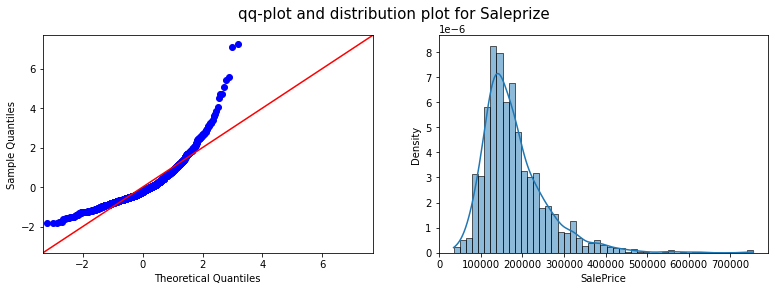

In [24]:
# Checking distribution of target variable
fig,ax=plt.subplots(1,2,figsize=(13, 4))
fig.suptitle("qq-plot and distribution plot for Saleprize",fontsize=15)
sm.qqplot(house['SalePrice'],fit=True,line='45',ax=ax[0])
sns.histplot(house['SalePrice'],kde=True,stat='density',ax=ax[1])
plt.show()

1. SalePrize(target variable) is not in linear form.
2. SalePrize values is right skewed. To overcome this we need to do data tranformation to make it as normal distribution

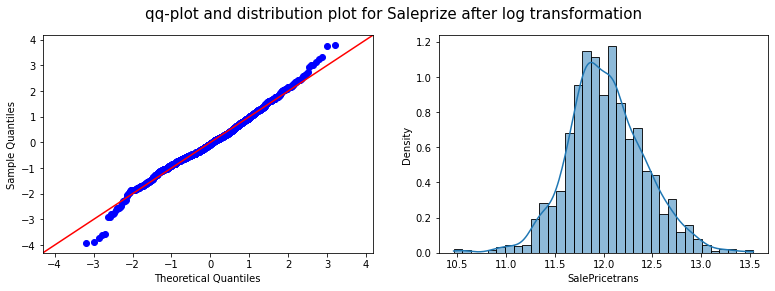

In [25]:
# Making log transformation for target variable
house['SalePricetrans']=np.log(house['SalePrice'])
# Checking distribution of target variable
fig,ax=plt.subplots(1,2,figsize=(13, 4))
fig.suptitle("qq-plot and distribution plot for Saleprize after log transformation",fontsize=15)
sm.qqplot(house['SalePricetrans'],fit=True,line='45',ax=ax[0])
sns.histplot(house['SalePricetrans'],kde=True,stat='density',ax=ax[1])
plt.show()

1. Since, data is skewed we are choosing log transformation.
2. After making log transformation the data look normally distributed, linear.

In [26]:
# Dropping the old data 
house = house.drop('SalePrice',axis='columns')

In [27]:
# Storing all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1460 non-null   float64
 1   LotArea         1460 non-null   int64  
 2   OverallQual     1460 non-null   int64  
 3   OverallCond     1460 non-null   int64  
 4   MasVnrArea      1460 non-null   float64
 5   BsmtFinSF1      1460 non-null   int64  
 6   BsmtUnfSF       1460 non-null   int64  
 7   TotalBsmtSF     1460 non-null   int64  
 8   1stFlrSF        1460 non-null   int64  
 9   2ndFlrSF        1460 non-null   int64  
 10  GrLivArea       1460 non-null   int64  
 11  TotRmsAbvGrd    1460 non-null   int64  
 12  GarageArea      1460 non-null   int64  
 13  WoodDeckSF      1460 non-null   int64  
 14  OpenPorchSF     1460 non-null   int64  
 15  HouseAge        1460 non-null   int64  
 16  RemodelAge      1460 non-null   int64  
 17  SoldAge         1460 non-null   i

We have total 27 columns of datatype integer and float

In [28]:
# Checking percentile values
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,6.517808,472.980137,94.244521,46.660274,50.732192,37.134247,14.184247,41.080822,12.024051
std,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,1.625393,213.804841,125.338794,66.256028,30.202904,20.645407,1.328095,25.979541,0.399452
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,12.000000,0.000000,10.460242
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,22.000000,18.000000,13.000000,19.000000,11.775097
50%,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,49.000000,28.000000,14.000000,37.500000,12.001505
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,68.000000,55.000000,15.000000,60.000000,12.273731
90%,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,9.000000,757.100000,262.000000,130.000000,97.100000,72.000000,16.000000,74.000000,12.535376
95%,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,10.000000,850.100000,335.000000,175.050000,106.000000,72.000000,16.000000,92.000000,12.694958
99%,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,11.000000,1002.790000,505.460000,285.820000,122.820000,72.000000,16.000000,104.820000,13.000323


### Univariate Analysis

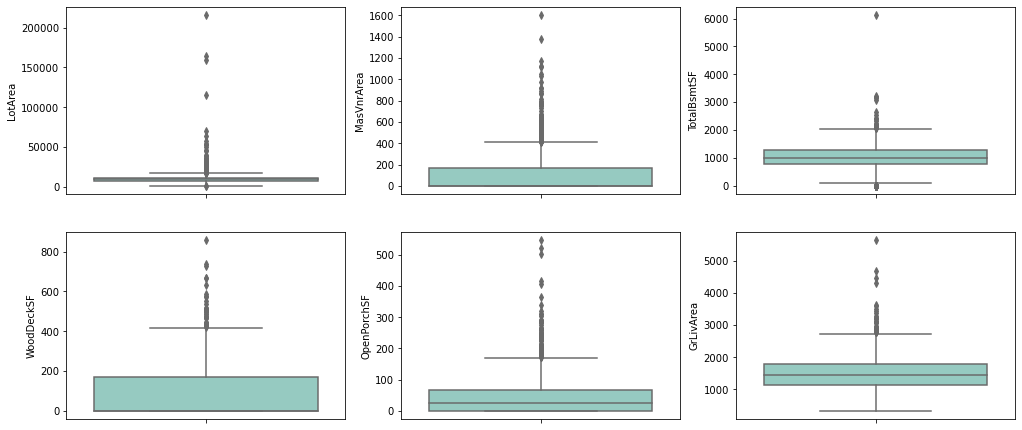

In [29]:
# Check the outliers in all the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = house)
plt.show()

There is outliers present in all the plots. Need to treat it.

### Bivariate Analysis 

<Figure size 360x216 with 0 Axes>

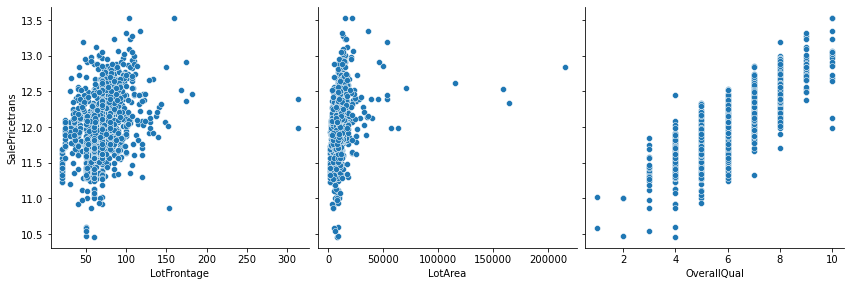

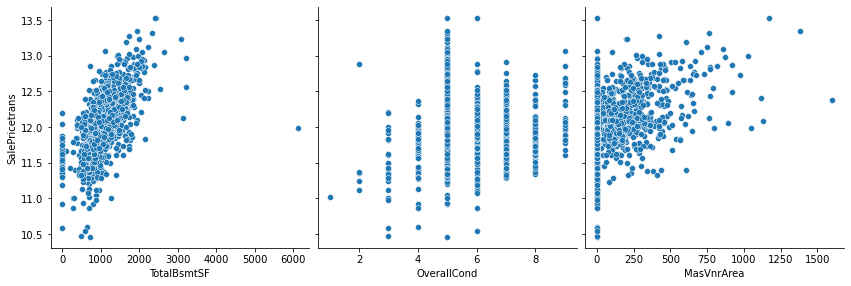

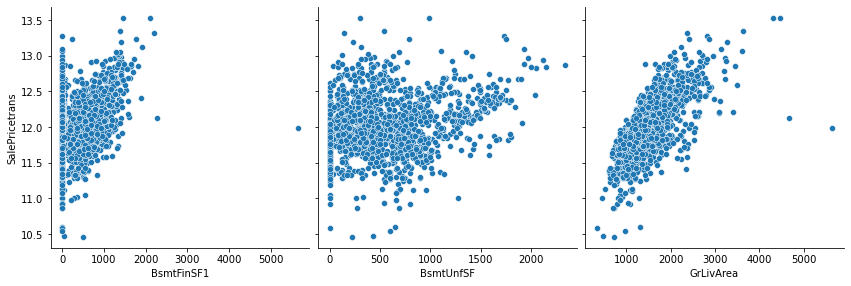

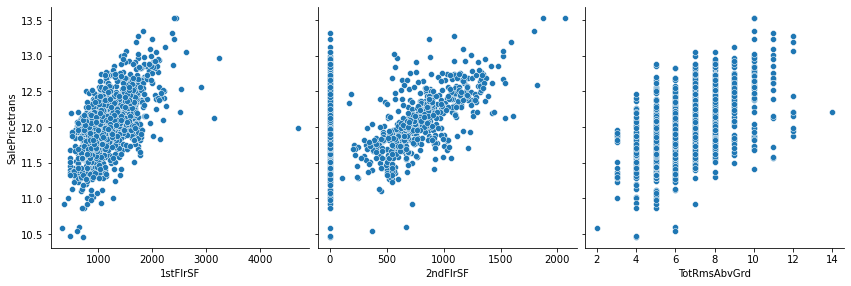

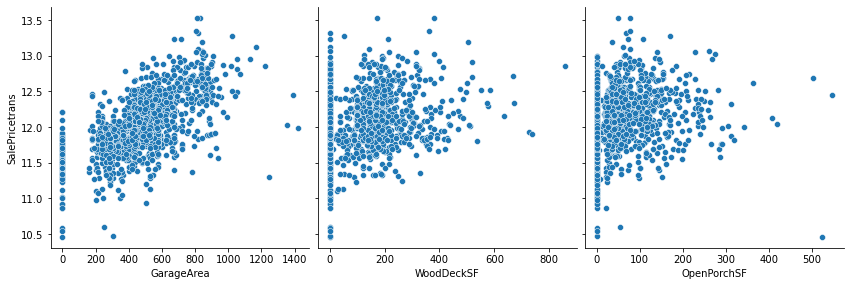

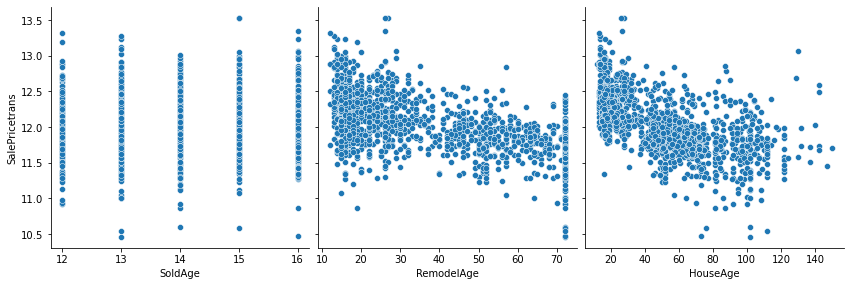

In [30]:
# Check the numerical values using pairplots
plt.figure(figsize=(5,3))
sns.pairplot(house, x_vars=['LotFrontage','LotArea','OverallQual'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['TotalBsmtSF', 'OverallCond','MasVnrArea'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','GrLivArea'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF','TotRmsAbvGrd' ], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageArea', 'WoodDeckSF','OpenPorchSF'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['SoldAge','RemodelAge','HouseAge'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
plt.show()

Outliers are present in most of variables. Need to treat it

In [31]:
# Dropping the outliers using IQR method
num_col = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','OpenPorchSF','WoodDeckSF','GarageArea']
def drop_outliers(x):
    
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

In [32]:
# Select all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.00000,1424.000000,1424.000000,1424.000000,1424.000000
mean,69.249606,9612.952247,6.076545,5.578652,97.937357,426.098315,568.537921,1040.110253,1146.829354,341.583567,1494.129916,6.487360,468.245084,91.455758,44.957865,50.68750,37.169242,14.178371,40.965590,12.012876
std,19.178193,3828.287739,1.362755,1.111238,163.916721,423.101424,441.506507,400.954110,359.961460,427.319799,485.212367,1.600635,210.182157,120.986352,61.450284,30.21904,20.686602,1.331465,25.975627,0.389023
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,12.00000,12.000000,12.000000,0.000000,10.471950
25%,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,223.750000,793.000000,876.750000,0.000000,1125.000000,5.000000,321.500000,0.000000,0.000000,21.00000,18.000000,13.000000,18.750000,11.770469
50%,70.049958,9375.000000,6.000000,5.000000,0.000000,371.000000,482.500000,982.500000,1078.500000,0.000000,1452.500000,6.000000,474.500000,0.000000,24.000000,49.00000,28.000000,14.000000,37.000000,11.986669
75%,78.250000,11405.250000,7.000000,6.000000,160.250000,697.000000,808.000000,1271.250000,1368.500000,728.000000,1766.250000,7.000000,576.000000,168.000000,66.000000,68.00000,55.000000,15.000000,60.000000,12.254863
max,168.000000,29959.000000,10.000000,9.000000,1047.000000,2188.000000,2336.000000,3094.000000,2898.000000,1818.000000,3608.000000,14.000000,1390.000000,736.000000,418.000000,150.00000,72.000000,16.000000,122.000000,13.323927


In [33]:
# Checking for the shape of dataset
house.shape

(1424, 49)

In [34]:
# Checking for the correlation of dataset
house.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
LotFrontage,1.000000,0.549274,0.208600,-0.055216,0.176455,0.111414,0.160735,0.311443,0.359131,0.047335,0.309876,0.304145,0.316013,0.084613,0.136131,-0.126404,-0.072533,-0.011644,-0.028641,0.351332
LotArea,0.549274,1.000000,0.185809,-0.004850,0.126152,0.154256,0.097446,0.303900,0.394284,0.115950,0.396475,0.361056,0.307358,0.158606,0.143864,-0.061108,-0.044966,0.024896,0.032864,0.392547
OverallQual,0.208600,0.185809,1.000000,-0.098878,0.414068,0.207827,0.312610,0.537118,0.465863,0.271065,0.580562,0.412338,0.559287,0.232474,0.321024,-0.583285,-0.552167,0.021905,-0.383691,0.824365
OverallCond,-0.055216,-0.004850,-0.098878,1.000000,-0.134146,-0.028390,-0.145321,-0.174649,-0.146788,0.024172,-0.084216,-0.061470,-0.147876,-0.005664,-0.049750,0.375253,-0.069470,-0.039411,0.287580,-0.041271
MasVnrArea,0.176455,0.126152,0.414068,-0.134146,1.000000,0.221116,0.129850,0.348460,0.334004,0.136199,0.360690,0.271252,0.379942,0.151069,0.127637,-0.322396,-0.179644,-0.007847,-0.186319,0.437348
BsmtFinSF1,0.111414,0.154256,0.207827,-0.028390,0.221116,1.000000,-0.538939,0.439624,0.364366,-0.191990,0.093777,-0.013633,0.253021,0.171404,0.076401,-0.250076,-0.126863,-0.028815,-0.094447,0.367388
BsmtUnfSF,0.160735,0.097446,0.312610,-0.145321,0.129850,-0.538939,1.000000,0.448893,0.341100,-0.000492,0.256028,0.252185,0.193653,0.005103,0.127091,-0.152040,-0.181307,0.041247,-0.160332,0.229246
TotalBsmtSF,0.311443,0.303900,0.537118,-0.174649,0.348460,0.439624,0.448893,1.000000,0.800671,-0.240654,0.378391,0.250046,0.472350,0.218479,0.228879,-0.412209,-0.305448,0.005587,-0.239438,0.638354
1stFlrSF,0.359131,0.394284,0.465863,-0.146788,0.334004,0.364366,0.341100,0.800671,1.000000,-0.262797,0.509057,0.382283,0.475193,0.215605,0.191612,-0.294529,-0.249017,0.006052,-0.161503,0.607254
2ndFlrSF,0.047335,0.115950,0.271065,0.024172,0.136199,-0.191990,-0.000492,-0.240654,-0.262797,1.000000,0.691180,0.611587,0.121234,0.084831,0.195162,-0.005315,-0.130580,0.025979,-0.038893,0.301204


### Correlation 

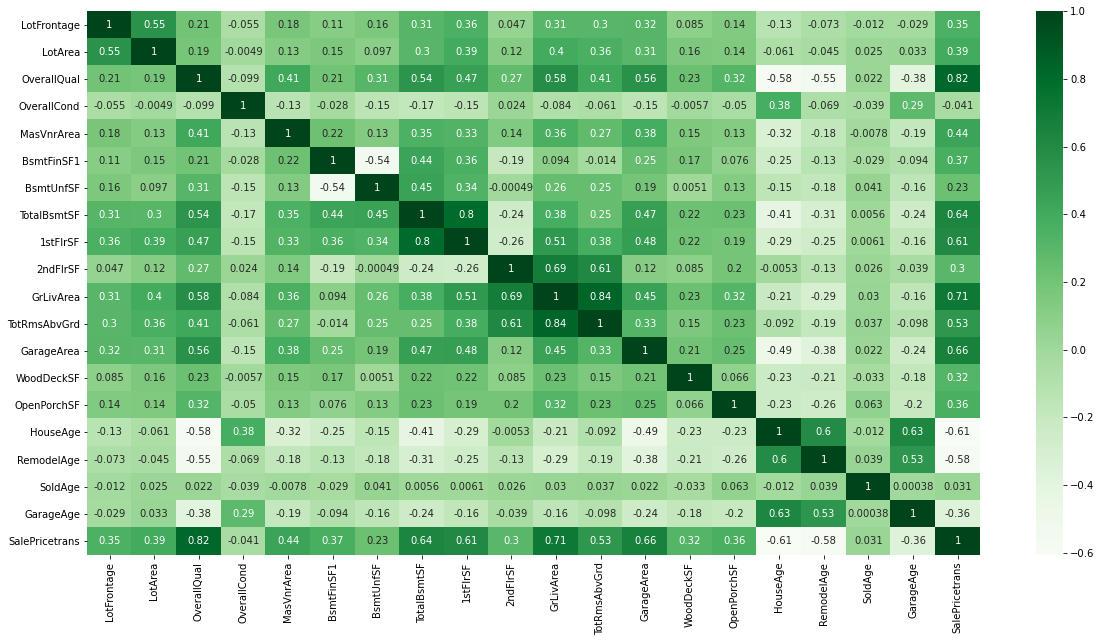

In [35]:
# Check the correlation of numerical columns
plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="Greens")
plt.show()

1. OverallQual,GrlivArea has high correlation with Salepricetrans.
2. Totalbsmtsf,totrmsabvgrd,1stflrsf has high correlation with salepricetrans
3. Overallqual has high negative correlation with houseage,remodelage

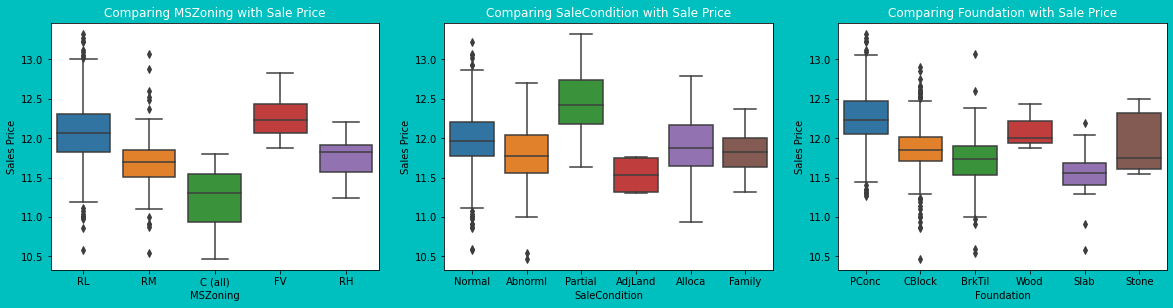

In [36]:
#Assigning figure size
plt.figure(figsize=(20,10),facecolor='c')
# subplot 1
plt.subplot(2,3,1)
sns.boxplot(x='MSZoning', y='SalePricetrans', data=house)
plt.title('Comparing MSZoning with Sale Price',color='w')
plt.xlabel('MSZoning')
plt.ylabel('Sales Price')
# subplot 2
plt.subplot(2,3,2)
sns.boxplot(x='SaleCondition', y='SalePricetrans', data=house)
plt.title('Comparing SaleCondition with Sale Price',color='w')
plt.xlabel('SaleCondition')
plt.ylabel('Sales Price')
# subplot 3
plt.subplot(2,3,3)
sns.boxplot(x='Foundation', y='SalePricetrans', data=house)
plt.title('Comparing Foundation with Sale Price',color='w')
plt.xlabel('Foundation')
plt.ylabel('Sales Price')
plt.show()

1.Sales price changes for different MSZoning
2.Salecondition also has some effect on saleprice
3.PCon house has highest saleprize value

In [37]:
# Select all categorical variables in the dataset
house_category = house.select_dtypes(include=['object'])
house_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1424 non-null   object
 1   MSZoning       1424 non-null   object
 2   LotShape       1424 non-null   object
 3   LotConfig      1424 non-null   object
 4   Neighborhood   1424 non-null   object
 5   BldgType       1424 non-null   object
 6   HouseStyle     1424 non-null   object
 7   RoofStyle      1424 non-null   object
 8   Exterior1st    1424 non-null   object
 9   Exterior2nd    1424 non-null   object
 10  MasVnrType     1424 non-null   object
 11  ExterQual      1424 non-null   object
 12  Foundation     1424 non-null   object
 13  BsmtQual       1424 non-null   object
 14  BsmtExposure   1424 non-null   object
 15  BsmtFinType1   1424 non-null   object
 16  HeatingQC      1424 non-null   object
 17  BsmtFullBath   1424 non-null   object
 18  FullBath       1424 non-null

In [38]:
#Creating dummy variables for category variables
housing_dum = pd.get_dummies(house_category,drop_first=True)

In [39]:
# Checking for the shape
housing_dum.shape

(1424, 171)

In [40]:
# Viewing new columns
housing_dum.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       ...
       'GarageCars_4', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_NA', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=171)

In [41]:
# Merging  the dataframe, with the dummy variable dataset.
house_prize = pd.concat([housing_dum,house_numeric],axis=1)

In [42]:
# Checking for the shape
house_prize.shape

(1424, 191)

# Model Building

##### Splitting the dataframe into Train and Test

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house_prize, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
# check the shape of training datatset
df_train.shape

(996, 191)

In [45]:
# check the shape of testing datatset
df_test.shape

(428, 191)

In [46]:
# Dropping response variable in numeric variables
house_numeric=house_numeric.drop('SalePricetrans',axis='columns')
house_numeric.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,SoldAge,GarageAge
0,65.0,8450,7,5,196.0,706,150,856,856,854,1710,8,548,0,61,19,19,14,19
1,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,6,460,298,0,46,46,15,46


In [47]:
# Scaling the numerical data
scaler = MinMaxScaler()
num_vars=house_numeric.columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# verifying the values after appying scaling.
df_train.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.00000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.0,996.000000,996.000000,996.000000,996.000000,996.000000,996.0,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000

In [48]:
# Checking for shape
df_train.shape

(996, 191)

In [49]:
# Building the Linear Model
y_train = df_train.pop('SalePricetrans')
X_train = df_train
print(y_train.shape) #Checking for shape of train and test
print(X_train.shape)

(996,)
(996, 190)


## Linear Regression 

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
#List of variables selected in top 50 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass_30', False, 24),
 ('MSSubClass_40', False, 33),
 ('MSSubClass_45', False, 28),
 ('MSSubClass_50', False, 95),
 ('MSSubClass_60', False, 50),
 ('MSSubClass_70', False, 139),
 ('MSSubClass_75', False, 15),
 ('MSSubClass_80', False, 45),
 ('MSSubClass_85', False, 100),
 ('MSSubClass_90', False, 3),
 ('MSSubClass_120', False, 61),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 46),
 ('MSSubClass_190', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 54),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 141),
 ('LotConfig_CulDSac', False, 134),
 ('LotConfig_FR2', False, 53),
 ('LotConfig_FR3', False, 69),
 ('LotConfig_Inside', False, 109),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', False, 123),
 ('Neighborhood_BrkSide', False, 14),
 ('Neighborhood_ClearCr', False, 25),
 ('Neighborhood_CollgCr', False, 105),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighbo

In [52]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_2fmCon', 'BldgType_Duplex', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'ExterQual_Fa', 'Foundation_Wood', 'BsmtQual_NA', 'BsmtExposure_Gd', 'BsmtFinType1_NA', 'BsmtFullBath_2', 'BsmtFullBath_3', 'BedroomAbvGr_5', 'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'FireplaceQu_NA', 'GarageType_NA', 'GarageFinish_NA', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'HouseAge'], dtype='object')

In [53]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,Neighborhood_Blueste,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_StoneBr,BldgType_2fmCon,BldgType_Duplex,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,ExterQual_Fa,Foundation_Wood,BsmtQual_NA,BsmtExposure_Gd,BsmtFinType1_NA,BsmtFullBath_2,BsmtFullBath_3,BedroomAbvGr_5,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_NA,GarageType_NA,GarageFinish_NA,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,HouseAge
128,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.224170,0.555556,0.500,0.234004,0.063356,0.213316,0.309713,0.4,0.318841
737,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.329768,0.777778,0.500,0.000000,0.382277,0.288623,0.448076,0.6,0.036232
1317,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.100673,0.666667,0.500,0.000000,0.578767,0.436975,0.310935,0.3,0.028986
150,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.325835,0.444444,0.625,0.327239,0.108305,0.313187,0.193952,0.3,0.253623
1109,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.362811,0.777778,0.500,0.474863,0.341182,0.593407,0.458766,0.5,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.258683,0.666667,0.500,0.009141,0.613870,0.469942,0.335980,0.4,0.065217
54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.207410,0.444444,0.500,0.175503,0.000000,0.124111,0.313378,0.4,0.398551
362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.213548,0.666667,0.500,0.000000,0.000000,0.000000,0.485034,0.5,0.050725
81,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.110597,0.555556,0.500,0.548903,0.015411,0.399806,0.306353,0.3,0.086957


In [54]:
# Model 1
import statsmodels.api as sm  

# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe)

 # Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()  

# Printing Summary of linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         SalePricetrans   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     283.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:03:59   Log-Likelihood:                 844.17
No. Observations:                 996   AIC:                            -1596.
Df Residuals:                     950   BIC:                            -1371.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.39

In [55]:
# Prdicting Y variable
y_train_pred = lm1.predict(X_train_rfe1)

### Checking Assumption

Text(0.5, 0, 'Errors')

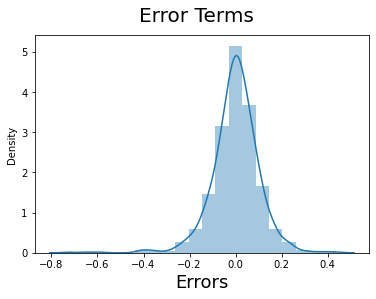

In [56]:
# check if the error terms are also normally distributed by plotting histogram
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)   # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms are left skewed which means linear regression assumption is not satisfied. we need to improve model using ridge or lasso method

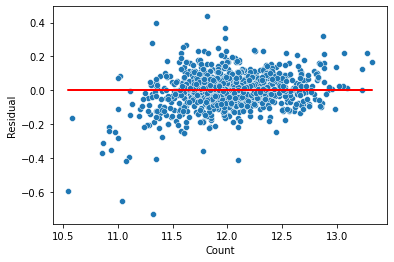

In [57]:
# Checking for Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Variance is not equal here which means linear regression assumption is not satisfied. . Need to improve model

In [58]:
# Scaling the numerical data only using transform
num_vars = house_numeric.columns

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [59]:
# Checking the dataframe
df_test.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.0,428.000000,428.0,428.000000,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.0,428.000000,428.000000,428.000000,428.000000

In [60]:
# Dividing into X_test and y_test
y_test = df_test.pop('SalePricetrans')
X_test = df_test

In [61]:
# use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)

In [62]:
# Making predictions
y_pred = lm1.predict(X_test_new1)

In [63]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2(train)',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print('R2(test)',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('RSS(train)',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred))
print('RSS(test)',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE(train)',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred)
print('MSE(test)',mse_test_lr)
metric.append(mse_test_lr**0.5)


R2(train) 0.9306791807398044
R2(test) 0.8916653098437203
RSS(train) 10.705431113608448
RSS(test) 6.598210900942814
MSE(train) 0.010748424812859888
MSE(test) 0.01541638060967947


Text(0, 0.5, 'y_pred')

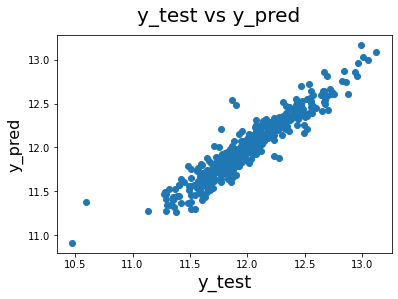

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Ridge Regression

In [65]:
# list of alphas to tune
params = {'alpha': [ 0.001, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0,5.0, 6.0,7.0, 8.0, 9.0,10.0,50,100]}

ridge = Ridge()

# cross validation
folds = 10
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing alpha value
print(ridge_cv.best_params_)

{'alpha': 0.2}


In [67]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[-0.1182958  -0.09534016  0.21341358  0.13669227  0.12229474  0.08019362
 -0.0705121   0.06485268  0.1303232  -0.09241583  0.08290461  0.15707275
  0.05807836 -0.12086528 -0.09785146 -0.29492319  0.08059904  0.02919183
  0.04198016  0.02919183 -0.10271942 -0.13657778 -0.00560256  0.07783048
 -0.00560256  0.16702503  0.31652843 -0.10905001  0.00484045  0.00679768
  0.01174206 -0.02338019 -0.06757917 -0.06757917 -0.04188677 -0.00465503
  0.06441107  0.04970991  0.13231607  0.07313196  0.13377444  0.1608159
  0.50421545  0.40332146  0.11062083 -0.08320031  0.38887571  0.87834017
  0.11054883 -0.49389602]


In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
#X_test_new = X_test[col]

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2(train)',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2(test)',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(train)',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(test)',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(train)',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(test)',mse_test_lr)
metric2.append(mse_test_lr**0.5)


R2(train) 0.9305308614137149
R2(test) 0.890570829234854
RSS(train) 10.728336531421073
RSS(test) 6.664871117295253
MSE(train) 0.010771422220302283
MSE(test) 0.015572128778727228


In [69]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
ridge_df.head(10)

,Features,Coefficient
47,GrLivArea,0.8783
42,OverallQual,0.5042
43,OverallCond,0.4033
46,TotalBsmtSF,0.3889
26,BsmtFullBath_3,0.3165
2,MSZoning_FV,0.2134
25,BsmtFullBath_2,0.1670
41,LotArea,0.1608
11,Neighborhood_StoneBr,0.1571
3,MSZoning_RH,0.1367


In [70]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.2,-0.072986,-0.078215,1
2,0.1,-0.072877,-0.078232,2
4,0.3,-0.073116,-0.078252,3
1,0.01,-0.072802,-0.078281,4
0,0.001,-0.072796,-0.078291,5
5,0.4,-0.073263,-0.078311,6
6,0.5,-0.073413,-0.078391,7
7,0.6,-0.073561,-0.078485,8
8,0.7,-0.073709,-0.078585,9
9,0.8,-0.073857,-0.078691,10


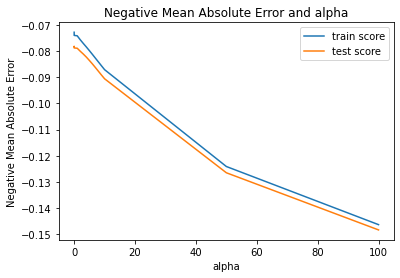

In [71]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Mean Absolute Error decreases as alpha increases.          
For high alpha value model is underfitting i.e more variance

# Lasso Regression

In [72]:
lasso = Lasso()
# List alpha to tune
params = {'alpha': [ 0.001, 0.01,0.0001,0.002,0.0002,0.003, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 0.002, 0.0002, 0.003,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0002}


In [74]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [75]:
lasso.coef_

array([-6.89664826e-02,  0.00000000e+00, -0.00000000e+00, -1.96404076e-03,
       -0.00000000e+00,  2.19353125e-02,  7.83071563e-03,  0.00000000e+00,
        7.94706709e-03, -1.42248771e-02, -2.42015693e-02, -9.18418245e-02,
       -0.00000000e+00, -3.76096849e-02,  4.18847761e-02,  1.83292322e-02,
        3.57934547e-02, -8.10767504e-03,  3.07934713e-02, -1.57627258e-03,
        0.00000000e+00,  1.81557669e-03, -2.72721281e-02, -0.00000000e+00,
       -5.58150504e-03,  0.00000000e+00, -0.00000000e+00,  2.79846758e-02,
        3.00096506e-02, -0.00000000e+00,  1.10163992e-01, -2.68311041e-02,
       -1.74015569e-02, -3.20881325e-02, -8.71939822e-02, -1.43586014e-02,
       -5.27692017e-03,  0.00000000e+00, -8.62840716e-03,  2.45515188e-02,
        4.77850012e-02, -2.51993737e-02,  0.00000000e+00, -1.82572340e-02,
        3.28004510e-03,  4.10445768e-02,  1.31372493e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -3.70727891e-03, -2.41304503e-02,
       -0.00000000e+00, -

Many coefficients are zero as lasso model redue some feature

In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2(train)',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2(test)',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(train)',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('R2(test)',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(train)',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(test)',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2(train) 0.9401310386332911
R2(test) 0.892477426144924
RSS(train) 9.2457511119262
R2(test) 6.548748308455532
MSE(train) 0.009282882642496186
MSE(test) 0.015300813804802645


In [77]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0,-0.072986,-0.078215,1
2,0,-0.072877,-0.078232,2
4,0,-0.073116,-0.078252,3
1,0,-0.072802,-0.078281,4
0,0,-0.072796,-0.078291,5
5,0,-0.073263,-0.078311,6
6,0,-0.073413,-0.078391,7
7,0,-0.073561,-0.078485,8
8,0,-0.073709,-0.078585,9
9,0,-0.073857,-0.078691,10


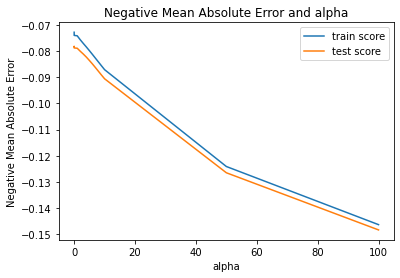

In [78]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Mean Absolute Error decreases as alpha increases.
For high alpha value model is underfitting i.e more variance

In [79]:
# Put the Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
181,GrLivArea,0.7459
173,OverallQual,0.4125
174,OverallCond,0.3405
178,TotalBsmtSF,0.3201
172,LotArea,0.1449
46,Neighborhood_StoneBr,0.1314
176,BsmtFinSF1,0.1109
30,Neighborhood_Crawfor,0.1102
170,SaleCondition_Partial,0.1028
125,BsmtFullBath_3,0.1025


In [80]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric','Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.930679,0.930531,0.940131
1,R2 Score (Test),0.891665,0.890571,0.892477
2,RSS (Train),10.705431,10.728337,9.245751
3,RSS (Test),6.598211,6.664871,6.548748
4,MSE (Train),0.103675,0.103785,0.096348
5,MSE (Test),0.124163,0.124788,0.123696


### Hyperparameter Value 

Alpha value for Ridge - 0.2         
Alpha value for Lasso - 0.0002

### Selecting Lasso as best model for this house prize prediction

From the above results we can specify that Lasso is the best model for finding the house price.
Because R square for both test and train value is high compare with other model.
RSS and MSE (Train and test) value also low for lasso model comparing other two models.

### Selecting best predictor

Following are the important predictors for predicting the house sale prize
1. Living Area
2. Overall Quality
3. Overall Condition
4. Total Basement
5. Lot Area
6. Neighborhood Stone
7. Basement Finish
8. Neighborhood Crawfor
9. Sale condition partial
10. Basement Full Basement

Since, above predictors has high coefficient value they describe the price of a house very well than other predictors.

# Subjective Question Solution

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [82]:
# Display ridge alpha value
print(ridge_cv.best_params_)

{'alpha': 0.2}


In [83]:
#Fitting Ridge model for alpha = 0.4 and printing coefficients which have been penalised
alpha = 0.4    # Double of original alpha value
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[-0.11411638 -0.08044796  0.19361874  0.11471567  0.10322167  0.05967346
 -0.06770211  0.0564326   0.12947481 -0.09051231  0.08241875  0.15561488
  0.04283317 -0.11646495 -0.08702327 -0.24865283  0.08082192  0.02850826
  0.01714292  0.02850826 -0.10599753 -0.12530767 -0.00706863  0.07961113
 -0.00706863  0.15847147  0.26771549 -0.10502474  0.00486102  0.00728545
  0.01344292 -0.02558939 -0.06725336 -0.06725336 -0.04213016 -0.00342236
  0.0663284   0.04647748  0.12086891  0.07303478  0.13385063  0.16014417
  0.50583584  0.39956366  0.12507391 -0.06862471  0.3690705   0.84897498
  0.12722693 -0.48864115]


In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
#X_test_new = X_test[col]

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2(train)',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2(test)',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS(train)',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS(test)',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE(train)',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE(test)',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2(train) 0.9302217369177743
R2(test) 0.8895288916782906
RSS(train) 10.77607559498291
RSS(test) 6.728331157047064
MSE(train) 0.010819353007010953
MSE(test) 0.015720399899642672


In [85]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
ridge_df.head(10)

,Features,Coefficient
47,GrLivArea,0.8490
42,OverallQual,0.5058
43,OverallCond,0.3996
46,TotalBsmtSF,0.3691
26,BsmtFullBath_3,0.2677
2,MSZoning_FV,0.1936
41,LotArea,0.1601
25,BsmtFullBath_2,0.1585
11,Neighborhood_StoneBr,0.1556
40,SaleCondition_Partial,0.1339


In [86]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0002}


In [87]:
#Fitting Ridge model for alpha = 0.0004 and printing coefficients which have been penalised

alpha =0.0004 # Double of original alpha value

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0004)

In [88]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
181,GrLivArea,0.7334
173,OverallQual,0.4489
174,OverallCond,0.3357
178,TotalBsmtSF,0.3213
172,LotArea,0.1452
176,BsmtFinSF1,0.1305
46,Neighborhood_StoneBr,0.1104
30,Neighborhood_Crawfor,0.1049
170,SaleCondition_Partial,0.1012
67,Exterior1st_BrkFace,0.0932


## Question 3:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [89]:
X_train_drop=X_train.drop(['GrLivArea','OverallQual','OverallCond','TotalBsmtSF','LotArea'],axis='columns')

In [90]:
lasso = Lasso()
params = {'alpha': [ 0.001, 0.01,0.0001,0.002,0.0002,0.003, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_drop, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 0.002, 0.0002, 0.003,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0002}


In [92]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_drop, y_train)

Lasso(alpha=0.0002)

In [93]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_drop.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
175,1stFlrSF,0.7618
176,2ndFlrSF,0.4359
46,Neighborhood_StoneBr,0.1591
173,BsmtFinSF1,0.1494
30,Neighborhood_Crawfor,0.1344
67,Exterior1st_BrkFace,0.1126
170,SaleCondition_Partial,0.1088
125,BsmtFullBath_3,0.1043
149,GarageType_Attchd,0.0945
178,GarageArea,0.0906
